In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time 
import sys
import neuroglancer

from tqdm import tqdm
from skimage import io
from ndpull import ndpull
import pandas as pd 
from skimage import measure
from scipy.ndimage import morphology
from at_synapse_detection import dataAccess as da
from at_synapse_detection import SynapseDetection as syn

In [3]:
%matplotlib notebook

In [4]:
# LM image filepaths 
psd_fn = 'collman_M247514_Rorb_1_Site3Align2_LENS_Session1_CROP_0_438_0_460_0_49/collman_M247514_Rorb_1_Site3Align2_LENS_Session1_CROP_0_438_0_460_0_49_PSD95_0.tiff'
synapsin_fn = 'collman_M247514_Rorb_1_Site3Align2_LENS_Session1_CROP_0_438_0_460_0_49/collman_M247514_Rorb_1_Site3Align2_LENS_Session1_CROP_0_438_0_460_0_49_synapsin_0.tiff'

# gaba_fn = 'collman_M247514_Rorb_1_Site3Align2_LENS_Session1_CROP_0_438_0_460_0_49/collman_M247514_Rorb_1_Site3Align2_LENS_Session1_CROP_0_438_0_460_0_49_GABA_0.tiff'
# gad_fn = 'collman_M247514_Rorb_1_Site3Align2_LENS_Session1_CROP_0_438_0_460_0_49/collman_M247514_Rorb_1_Site3Align2_LENS_Session1_CROP_0_438_0_460_0_49_GAD2_0.tiff'
# gephyrin_fn = 'collman_M247514_Rorb_1_Site3Align2_LENS_Session1_CROP_0_438_0_460_0_49/collman_M247514_Rorb_1_Site3Align2_LENS_Session1_CROP_0_438_0_460_0_49_Gephyrin_0.tiff'
# glun1_fn = 'collman_M247514_Rorb_1_Site3Align2_LENS_Session1_CROP_0_438_0_460_0_49/collman_M247514_Rorb_1_Site3Align2_LENS_Session1_CROP_0_438_0_460_0_49_GluN1_0.tiff'
# vglut1_fn = 'collman_M247514_Rorb_1_Site3Align2_LENS_Session1_CROP_0_438_0_460_0_49/collman_M247514_Rorb_1_Site3Align2_LENS_Session1_CROP_0_438_0_460_0_49_VGlut1_0.tiff'

In [5]:
fn_list = [psd_fn, synapsin_fn] #, gaba_fn, gad_fn, gephyrin_fn, glun1_fn, vglut1_fn]
fn_name = ['PSD-95', 'Synapsin'] #, 'GABA', 'GAD', 'Gephyrin', 'GLUN1', 'VGLUT1']

In [7]:
# Load annotations 
lm_labels_dict = np.load('lm_labels_dict.npy').item()

In [11]:
# Evaluate LM signal overlap with labels
lm_overlap = np.zeros((len(lm_labels_dict.keys()), len(fn_list)))

for fn_ind, fn in enumerate(fn_list): 
    vol = da.imreadtiff(fn)
    synaptic_volumes = {'presynaptic': [], 'postsynaptic': [vol]}
    min_num_of_slices = 1
    # Create query
    query = {'preIF': ['presynaptic'], 'preIF_z': [],
             'postIF': ['postsynaptic'], 'postIF_z': [min_num_of_slices],
             'punctumSize': 2}
    
    resultVol = syn.getSynapseDetections(synaptic_volumes, query)
    
    output_mat, detections = evaluate_detections(resultVol)
    lm_overlap[:, fn_ind] = np.sum(output_mat, 1)
    print('Done with ', fn_name[fn_ind])

starting z ind: 0
starting z ind: 1
starting z ind: 2
starting z ind: 3
starting z ind: 4
starting z ind: 5
starting z ind: 6
starting z ind: 7
starting z ind: 8
starting z ind: 9
starting z ind: 10
starting z ind: 11
starting z ind: 12
starting z ind: 13
starting z ind: 14
starting z ind: 15
starting z ind: 16
starting z ind: 17
starting z ind: 18
starting z ind: 19
starting z ind: 20
starting z ind: 21
starting z ind: 22
starting z ind: 23
starting z ind: 24
starting z ind: 25
starting z ind: 26
starting z ind: 27
starting z ind: 28
starting z ind: 29
starting z ind: 30
starting z ind: 31
starting z ind: 32
starting z ind: 33
starting z ind: 34
starting z ind: 35
starting z ind: 36
starting z ind: 37
starting z ind: 38
starting z ind: 39
starting z ind: 40
starting z ind: 41
starting z ind: 42
starting z ind: 43
starting z ind: 44
starting z ind: 45
starting z ind: 46
starting z ind: 47
starting z ind: 48
Number of detections:  2176
Hit Count:  819
Miss Count:  222
Done with  PSD-95


In [12]:
# Evaluate Synapse Detection 

In [14]:
synapse_signal_mat = np.zeros((len(lm_labels_dict.keys()), 1))

psd_vol = da.imreadtiff(psd_fn)
synapsin_vol = da.imreadtiff(synapsin_fn)

synaptic_volumes = {'presynaptic': [synapsin_vol], 'postsynaptic': [psd_vol]}
min_num_of_slices = 1

# Create query
query = {'preIF': ['presynaptic'], 'preIF_z': [min_num_of_slices],
         'postIF': ['postsynaptic'], 'postIF_z': [min_num_of_slices],
         'punctumSize': 2}

resultVol = syn.getSynapseDetections(synaptic_volumes, query)

output_mat, synapse_detections = evaluate_detections(resultVol)
synapse_signal_mat[:, 0] = np.sum(output_mat, 1)
print('Done with PSD, Synapsin Query')

starting z ind: 0
starting z ind: 1
starting z ind: 2
starting z ind: 3
starting z ind: 4
starting z ind: 5
starting z ind: 6
starting z ind: 7
starting z ind: 8
starting z ind: 9
starting z ind: 10
starting z ind: 11
starting z ind: 12
starting z ind: 13
starting z ind: 14
starting z ind: 15
starting z ind: 16
starting z ind: 17
starting z ind: 18
starting z ind: 19
starting z ind: 20
starting z ind: 21
starting z ind: 22
starting z ind: 23
starting z ind: 24
starting z ind: 25
starting z ind: 26
starting z ind: 27
starting z ind: 28
starting z ind: 29
starting z ind: 30
starting z ind: 31
starting z ind: 32
starting z ind: 33
starting z ind: 34
starting z ind: 35
starting z ind: 36
starting z ind: 37
starting z ind: 38
starting z ind: 39
starting z ind: 40
starting z ind: 41
starting z ind: 42
starting z ind: 43
starting z ind: 44
starting z ind: 45
starting z ind: 46
starting z ind: 47
starting z ind: 48
Number of detections:  906
Hit Count:  565
Miss Count:  476
Done with PSD, Syna

In [43]:
output_mat, synapse_detections = evaluate_detections(resultVol)
synapse_signal_mat[:, 0] = np.sum(output_mat, 1)
print('Done with PSD, Synapsin Query')

Number of detections:  1053
Hit Count:  591
Miss Count:  450
Done with PSD, Synapsin Query


In [15]:
output_mat.shape

(1041, 906)

In [42]:
def evaluate_detections(resultVol): 
    """
    Evaluate RORB annotations with LM volume
    
    Parameters
    --------------
    resultVol : 3D numpy array 
    
    Returns
    --------------
    output_mat  
    detections
    """
    
    thresh  =  0.9 # This is a constant
    bw_vol  = resultVol > thresh
#     label_vol = measure.label(bw_vol > thresh)
#     stats = measure.regionprops(label_vol)
    
    # Dilate detections 
    SE = morphology.generate_binary_structure(2, 2)
    bw_vol_dilate = np.copy(bw_vol)
    for z in range(0, bw_vol.shape[2]): 
        bw_vol_dilate[:, :, z] = morphology.binary_dilation(bw_vol[:, :, z], SE)
        
    #create mask 
    maskvol = np.zeros((460, 438, 49))
#     global_minx = 152
#     global_maxx = 288
#     global_miny = 149
#     global_maxy = 317
    global_minx = 145
    global_maxx = 325
    global_miny = 145
    global_maxy = 325
    maskvol[global_minx:global_maxx, global_miny:global_maxy, :] = 1 
    
    # Mask detections to match label region
    masked_detections_vol = maskvol*bw_vol_dilate
    
    # Run regionprops
    label_vol = measure.label(masked_detections_vol)
    detections = measure.regionprops(label_vol)
    print('Number of detections: ', len(detections))
    
    detection_vol = np.copy(label_vol)

    hit_count = 0
    miss_count = 0
    shape = (460, 438, 49)
    output_mat = np.zeros((len(lm_labels_dict.keys()), len(detections)))

    for label_ind, key in enumerate(lm_labels_dict.keys()): 

        synapse_label = lm_labels_dict[key]
        single_label_vol = make_label_vol(synapse_label, shape)

        label_detection_vol = single_label_vol*detection_vol
        unique_vals = np.unique(label_detection_vol)

        if len(unique_vals) > 1: 
            index = np.argwhere(unique_vals==0)
            unique_vals = np.abs(np.delete(unique_vals, index))
            output_mat[label_ind, unique_vals] = 1 
            hit_count = hit_count + 1 
        else: 
            miss_count = miss_count + 1 
            
    print('Hit Count: ', hit_count)
    print('Miss Count: ', miss_count)

    return output_mat, detections

In [9]:
def make_label_vol(synapse_label, shape): 
    """This returns a volume of all zeros, expect where the synapse_label indicates. Those values are -1"""
    labelvol = np.zeros(shape, dtype=np.int64)
    for n in range(0, synapse_label.shape[0]): 
        labelvol[synapse_label[n][0], synapse_label[n][1], synapse_label[n][2]] = -1
    
    return labelvol

In [10]:
def make_clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="{}">{}</a>'.format(val, val)

In [16]:
ng_server="https://viz.boss.neurodata.io"
ng_url="https://viz.boss.neurodata.io/#!%7B'layers':%7B'em_clahe':%7B'type':'image'_'source':'boss://https://api.boss.neurodata.io/collman/M247514_Rorb_1_Site3Align2_EM/em_clahe'%7D_'PSD95':%7B'type':'image'_'source':'boss://https://api.boss.neurodata.io/collman/M247514_Rorb_1_Site3Align2_LENS_Session1_CROP/PSD95?'_'blend':'additive'_'color':1_'max':0.63%7D_'synapsin':%7B'type':'image'_'source':'boss://https://api.boss.neurodata.io/collman/M247514_Rorb_1_Site3Align2_LENS_Session1_CROP/synapsin?'_'blend':'additive'_'color':2_'max':0.66%7D_'m247514_Site3Annotation_MN_global':%7B'type':'segmentation'_'source':'boss://https://api.boss.neurodata.io/collman/M247514_Rorb_1_Site3Align2_EM/m247514_Site3Annotation_MN_global'%7D%7D_'navigation':%7B'pose':%7B'position':%7B'voxelSize':%5B96_96_50%5D_'voxelCoordinates':%5B251.3346405029297_256.0650939941406_23%5D%7D%7D_'zoomFactor':3.125%7D%7D"
state=neuroglancer.parse_url(ng_url)


In [17]:
# Generate URLs
miss_count = 0
keylist = list(lm_labels_dict.keys())
htmllist = [] 

for label_ind in range(0, len(keylist)): 
    synapse_label = lm_labels_dict[keylist[label_ind]]
    midpoint = np.mean(synapse_label, 0)
    midpoint = np.round(midpoint)
    miss_count = miss_count + 1 
    state.position.voxelCoordinates=[midpoint[1],midpoint[0],midpoint[2]]
    link = """<a href="%s">%s</a> """%(neuroglancer.to_url(state,ng_server),'synapse_'+str(keylist[label_ind]))
    htmllist.append(link)
    



In [18]:
result_labels = ['Has PSD-95', 'Has Synapsin', 'Detected', 'link']
df = pd.DataFrame(np.nan, index=keylist, columns=result_labels)
df.iloc[:, 0] = 1*(overlap_signal_mat[:, 0] > 0)
df.iloc[:, 1] = 1*(overlap_signal_mat[:, 1] > 0)
df.iloc[:, 2] = 1*(synapse_signal_mat[:, 0] > 0)
df.iloc[:, 3] = htmllist

# Result Table 

To see the labeled synapse in NDViz, click the very last column. 

In [19]:
df.style.format(make_clickable)

,Has PSD-95,Has Synapsin,Detected,link
1.0,1,1,1,"<a target=""_blank"" href=""<a href=""https://viz.boss.neurodata.io#!%7B%22layers%22:%7B%22em_clahe%22:%7B%22type%22:%22image%22,%22source%22:%22boss://https://api.boss.neurodata.io/collman/M247514_Rorb_1_Site3Align2_EM/em_clahe%22%7D,%22PSD95%22:%7B%22type%22:%22image%22,%22source%22:%22boss://https://api.boss.neurodata.io/collman/M247514_Rorb_1_Site3Align2_LENS_Session1_CROP/PSD95?%22,%22blend%22:%22additive%22,%22color%22:1,%22max%22:0.63%7D,%22synapsin%22:%7B%22type%22:%22image%22,%22source%22:%22boss://https://api.boss.neurodata.io/collman/M247514_Rorb_1_Site3Align2_LENS_Session1_CROP/synapsin?%22,%22blend%22:%22additive%22,%22color%22:2,%22max%22:0.66%7D,%22m247514_Site3Annotation_MN_global%22:%7B%22type%22:%22segmentation%22,%22source%22:%22boss://https://api.boss.neurodata.io/collman/M247514_Rorb_1_Site3Align2_EM/m247514_Site3Annotation_MN_global%22%7D%7D,%22navigation%22:%7B%22pose%22:%7B%22position%22:%7B%22voxelSize%22:%5B96,96,50%5D,%22voxelCoordinates%22:%5B228.0,186.0,40.0%5D%7D%7D,%22zoomFactor%22:3.125%7D%7D"">synapse_1.0 ""><a href=""https://viz.boss.neurodata.io#!%7B%22layers%22:%7B%22em_clahe%22:%7B%22type%22:%22image%22,%22source%22:%22boss://https://api.boss.neurodata.io/collman/M247514_Rorb_1_Site3Align2_EM/em_clahe%22%7D,%22PSD95%22:%7B%22type%22:%22image%22,%22source%22:%22boss://https://api.boss.neurodata.io/collman/M247514_Rorb_1_Site3Align2_LENS_Session1_CROP/PSD95?%22,%22blend%22:%22additive%22,%22color%22:1,%22max%22:0.63%7D,%22synapsin%22:%7B%22type%22:%22image%22,%22source%22:%22boss://https://api.boss.neurodata.io/collman/M247514_Rorb_1_Site3Align2_LENS_Session1_CROP/synapsin?%22,%22blend%22:%22additive%22,%22color%22:2,%22max%22:0.66%7D,%22m247514_Site3Annotation_MN_global%22:%7B%22type%22:%22segmentation%22,%22source%22:%22boss://https://api.boss.neurodata.io/collman/M247514_Rorb_1_Site3Align2_EM/m247514_Site3Annotation_MN_global%22%7D%7D,%22navigation%22:%7B%22pose%22:%7B%22position%22:%7B%22voxelSize%22:%5B96,96,50%5D,%22voxelCoordinates%22:%5B228.0,186.0,40.0%5D%7D%7D,%22zoomFactor%22:3.125%7D%7D"">synapse_1.0"
2.0,1,1,1,"<a target=""_blank"" href=""<a href=""https://viz.boss.neurodata.io#!%7B%22layers%22:%7B%22em_clahe%22:%7B%22type%22:%22image%22,%22source%22:%22boss://https://api.boss.neurodata.io/collman/M247514_Rorb_1_Site3Align2_EM/em_clahe%22%7D,%22PSD95%22:%7B%22type%22:%22image%22,%22source%22:%22boss://https://api.boss.neurodata.io/collman/M247514_Rorb_1_Site3Align2_LENS_Session1_CROP/PSD95?%22,%22blend%22:%22additive%22,%22color%22:1,%22max%22:0.63%7D,%22synapsin%22:%7B%22type%22:%22image%22,%22source%22:%22boss://https://api.boss.neurodata.io/collman/M247514_Rorb_1_Site3Align2_LENS_Session1_CROP/synapsin?%22,%22blend%22:%22additive%22,%22color%22:2,%22max%22:0.66%7D,%22m247514_Site3Annotation_MN_global%22:%7B%22type%22:%22segmentation%22,%22source%22:%22boss://https://api.boss.neurodata.io/collman/M247514_Rorb_1_Site3Align2_EM/m247514_Site3Annotation_MN_global%22%7D%7D,%22navigation%22:%7B%22pose%22:%7B%22position%22:%7B%22voxelSize%22:%5B96,96,50%5D,%22voxelCoordinates%22:%5B238.0,188.0,39.0%5D%7D%7D,%22zoomFactor%22:3.125%7D%7D"">synapse_2.0 ""><a href=""https://viz.boss.neurodata.io#!%7B%22layers%22:%7B%22em_clahe%22:%7B%22type%22:%22image%22,%22source%22:%22boss://https://api.boss.neurodata.io/collman/M247514_Rorb_1_Site3Align2_EM/em_clahe%22%7D,%22PSD95%22:%7B%22type%22:%22image%22,%22source%22:%22boss://https://api.boss.neurodata.io/collman/M247514_Rorb_1_Site3Align2_LENS_Session1_CROP/PSD95?%22,%22blend%22:%22additive%22,%22color%22:1,%22max%22:0.63%7D,%22synapsin%22:%7B%22type%22:%22image%22,%22source%22:%22boss://https://api.boss.neurodata.io/collman/M247514_Rorb_1_Site3Align2_LENS_Session1_CROP/synapsin?%22,%22blend%22:%22additive%22,%22color%22:2,%22max%22:0.66%7D,%22m247514_Site3Annotation_MN_global%22:%7B%22type%22:%22segmentation%22,%22source%22:%22boss://https://api.boss.neurodata.io/collman/M247514_Rorb_1_Site3Ali

In [20]:
df.to_csv('/Users/anish/Documents/Connectome/rorb-analysis/test.csv')

### Create histograms

Number of detections per EM-synapse-label

In [74]:
detections_per_emlabel = np.sum(output_mat, 1)

In [106]:
zero_hits = 0 
one_hit = 0 
two_hits = 0 
nopsd = 0

overlap_with_psd = (overlap_signal_mat[:, 0])
for label_ind in range(0, len(keylist)): 
    
    if overlap_with_psd[label_ind] > 0: 
        if detections_per_emlabel[label_ind]==0: 
            zero_hits = zero_hits + 1
        elif detections_per_emlabel[label_ind]==1: 
            one_hit = one_hit + 1 
        else: 
            two_hits = two_hits + 1 
    else: 
        nopsd = nopsd + 1
        
total_labels = zero_hits+one_hit+two_hits
print("No PSD: ", nopsd)
print('Zero Hits: ', zero_hits)
print('One Hit: ', one_hit)
print('Two Hits: ', two_hits)
print('Percentage of labels detected: ', (one_hit+two_hits)/total_labels)

No PSD:  222
Zero Hits:  237
One Hit:  519
Two Hits:  63
Percentage of labels detected:  0.7106227106227107


<IPython.core.display.Javascript object>


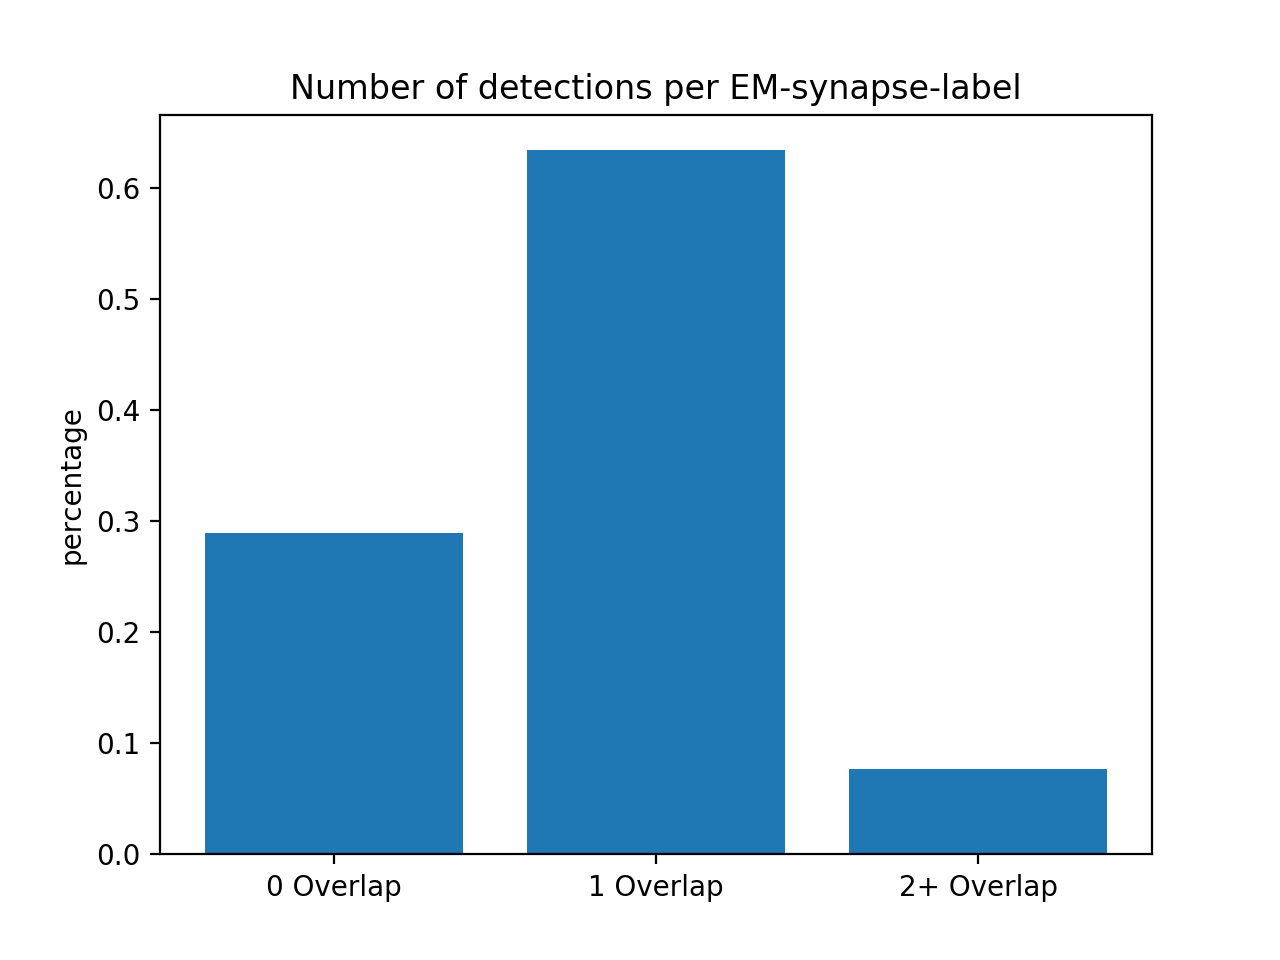

([<matplotlib.axis.XTick at 0x129fbf860>,
 <a list of 3 Text xticklabel objects>)

In [107]:
plt.figure()
plt.bar([0, 1, 2], [zero_hits/total_labels, one_hit/total_labels, two_hits/total_labels])
plt.ylabel('percentage')
plt.title('Number of detections per EM-synapse-label')
plt.xticks([0, 1, 2], ['0 Overlap', '1 Overlap', '2+ Overlap'])

Number of EM-synapse-labels per detection

In [99]:
output_mat.shape

(1041, 1053)

In [97]:
labels_per_detections = np.sum(output_mat, 0)

In [103]:
labels_per_detections[0:200]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0.,
       3., 2., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 2., 1., 0., 1., 2., 3., 1., 1., 2., 0.,
       0., 2., 1., 0., 0., 0., 0., 2., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 2., 1., 0., 1., 0., 0., 1., 1., 2., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 2., 1., 0., 0., 3., 0., 2., 2.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 2., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 2., 1., 1., 2., 2., 0., 0., 1.])

In [104]:
zero_hits = 0 
one_hit = 0 
two_hits = 0 

for detection_ind in range(0, len(labels_per_detections)): 
    
    if labels_per_detections[detection_ind]==0: 
        zero_hits = zero_hits + 1
    elif labels_per_detections[detection_ind]==1: 
        one_hit = one_hit + 1 
    else: 
        two_hits = two_hits + 1 


total_labels = zero_hits+one_hit+two_hits
print('Zero Hits: ', zero_hits)
print('One Hit: ', one_hit)
print('Two Hits: ', two_hits)
print('Percentage of detections with labels: ', (one_hit+two_hits)/total_labels)

Zero Hits:  583
One Hit:  339
Two Hits:  131
Percentage of detections with labels:  0.44634377967711303
